## 4.1. combine patterns and change groups

In this notebook we combine the patterns and cell type specificities of the top 500 response genes. In Notebook 2.3 we grouped the top 500 response genes into 14 groups based on the change scores in each cluster. This gave us some information about the cluster specificity of the response of the genes. In Notebook 3.3 those same 500 response genes were also clustered into 16 (pseudotime) patterns. In this notebook we will combine this information and look at the relation between the patterns and the cluster specificities.  

In case you don't want to run Notebook 2.3 and 3.3, you can find the cell type specificity groups and the pattern clusters in the Github repository under `results/pseudotime/` and `results/change_scores/`. 

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
import matplotlib.colors as plt_colors # for converting rgb to #
from matplotlib.colors import LinearSegmentedColormap #for own cmap
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

# import own functions
from plotting import *
from utils import *

%load_ext autoreload
%autoreload 2

### Load data

Here, we load the change groups (assigned in Notebook 2.3) and the pattern clusters (assigned in Notebook 3.3).  

In [2]:
### load change score groups response genes
groups_path = "../results/change_scores/change_groups_response_genes.csv"
groups = pd.read_csv(groups_path)
groups.columns = range(1,len(groups.columns)+1)
groups = groups.melt()
groups = groups.dropna(axis=0)
groups = pd.Series(groups["variable"].values, index=groups["value"].values)

In [3]:
### load pattern clusters response genes
patterns_path = "../results/pseudotime/pseudotime_pattern_clusters_response_genes.csv"
patterns = pd.read_csv(patterns_path)
patterns.columns = range(1, len(patterns.columns)+1)
patterns = patterns.melt()
patterns = patterns.dropna(axis=0)
patterns = pd.Series(patterns["variable"].values, index=patterns["value"].values)

In [4]:
### make dataframe with for each response genes its change score group and pattern 
all_response_genes = pd.concat([patterns, groups], axis=1)
all_response_genes.columns = ["pattern", "group"]

### Plot combination of patterns and groups in heatmap

Here, we create a heatmap that combines the information about cluster specificity (change score groups) and the pseudotime patterns. It is important to note that just for the colouring all the rows have been scaled. This results in a heatmap were the darkest color can be used for different absolute values depending on the row. We choose to do this, so that the groups with very small numbers of genes get as much attention as the groups with larger numbers of genes.

Also, in our publication the figure includes UMAPs on the left hand side and patterns on the top of the heatmap. These have been manually added using a image editor, but those images can be found in Notebook 2.3 and Notebook 3.3.

In [5]:
combined_data = all_response_genes.groupby(['group','pattern']).size().unstack(fill_value=0)

In [6]:
### scale rows (change score groups) between 0 and 1
combined_data_scaled = combined_data.divide(combined_data.max(axis=1), axis=0)

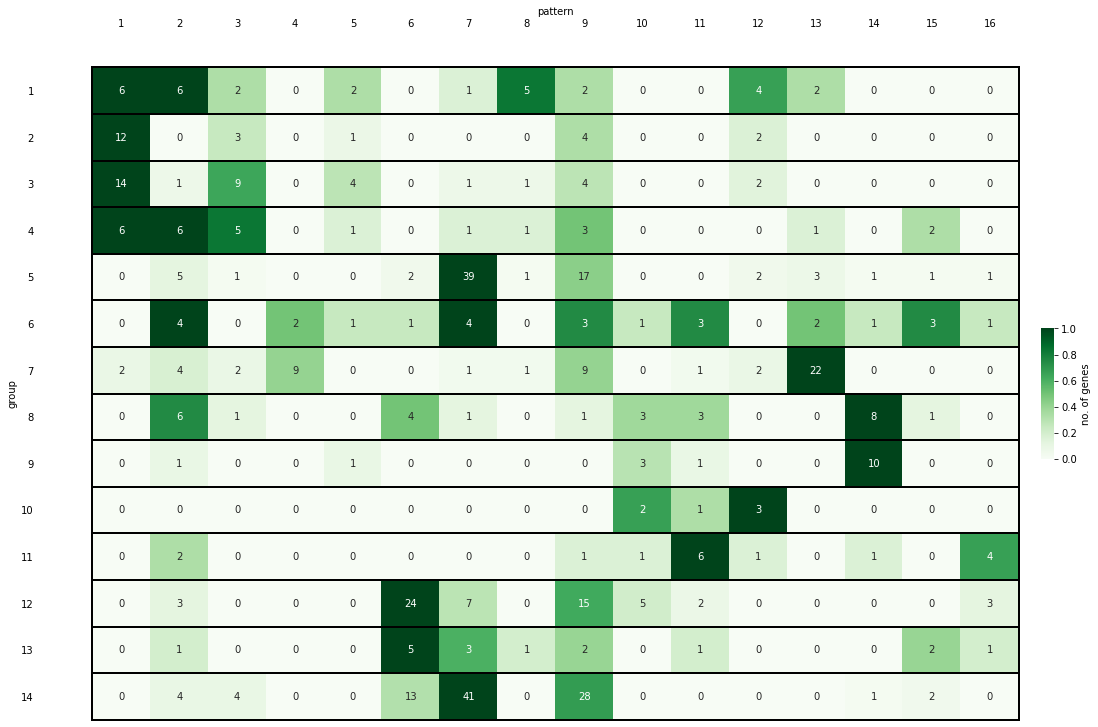

In [7]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

sns.heatmap(
    combined_data_scaled, 
    cmap='Greens', 
    ax=ax,
    annot=np.array(combined_data), 
    cbar=True,
    cbar_kws = dict(use_gridspec=False,location="right", 
                    shrink=0.2, aspect=10, pad=0.02, 
                    label="no. of genes", ticks=None)
)
ax.tick_params(axis='x',
               bottom=False, labelbottom=False, 
               top=False, labeltop=True, pad=35.)

ax.tick_params(axis='y',
               left=False, labelleft=True, 
               right=False, labelright=False, pad=55., labelrotation=0)

ax.xaxis.set_label_position('top')

# add black lines
for i in ax.get_yticks():
    ax.axhline(i+0.5, color='black',ls='-', xmin=0, xmax=1, clip_on = False, linewidth=2)
ax.axhline(0, color='black',ls='-', xmin=0, xmax=1, clip_on = False, linewidth=2)
ax.axvline(0, color='black',ls='-', ymin=0, ymax=1, clip_on = False, linewidth=2)
ax.axvline(16, color='black',ls='-', ymin=0, ymax=1, clip_on = False, linewidth=2)

# save figure
save_path = f"../figures/4.1.heatmap_patterns_groups_combined.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=40)

plt.show()

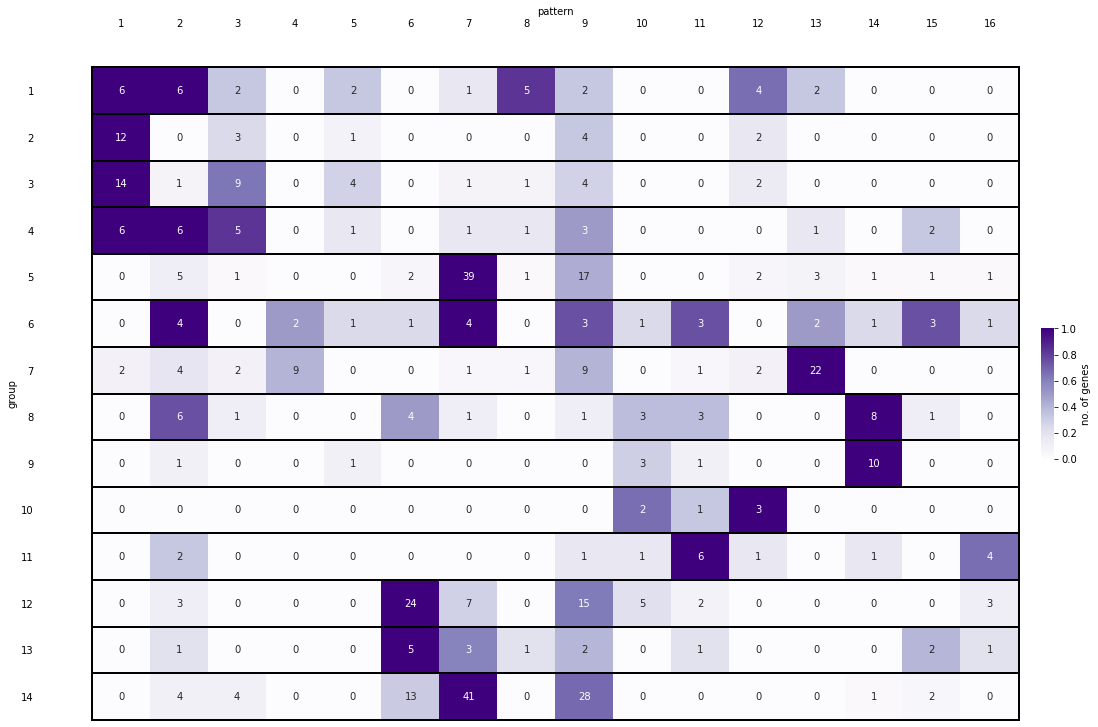

In [8]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

sns.heatmap(
    combined_data_scaled, 
    cmap='Purples', 
    ax=ax,
    annot=np.array(combined_data), 
    cbar=True,
    cbar_kws = dict(use_gridspec=False,location="right", 
                    shrink=0.2, aspect=10, pad=0.02, 
                    label="no. of genes", ticks=None)
)
ax.tick_params(axis='x',
               bottom=False, labelbottom=False, 
               top=False, labeltop=True, pad=35.)

ax.tick_params(axis='y',
               left=False, labelleft=True, 
               right=False, labelright=False, pad=55., labelrotation=0)

ax.xaxis.set_label_position('top')

# add black lines
for i in ax.get_yticks():
    ax.axhline(i+0.5, color='black',ls='-', xmin=0, xmax=1, clip_on = False, linewidth=2)
ax.axhline(0, color='black',ls='-', xmin=0, xmax=1, clip_on = False, linewidth=2)
ax.axvline(0, color='black',ls='-', ymin=0, ymax=1, clip_on = False, linewidth=2)
ax.axvline(16, color='black',ls='-', ymin=0, ymax=1, clip_on = False, linewidth=2)

# save figure
save_path = f"../figures/4.1.heatmap_patterns_groups_combined_purple.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=40)

plt.show()